In [1]:
from rdkit.Chem import AllChem as Chem
import pandas as pd
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw

In [ ]:
mtor = pd.read_csv("../../data/chembl_mtor_ic50.csv", delimiter=";")
mtor = mtor[["Molecule ChEMBL ID", "Smiles", "pChEMBL Value"]]
mtor["mol"] = mtor.apply(lambda row: Chem.MolFromSmiles(row["Smiles"]), axis=1)
mtor = mtor.fillna(0)

In [2]:
drugbank_mols =  Chem.SDMolSupplier('../../data/drugbank.sdf')
drugbank = [mol for mol in drugbank_mols if mol]
pd_drugbank = pd.DataFrame(drugbank, columns=["mol"])
pd_drugbank["Smiles"] = pd_drugbank.apply(lambda row: Chem.MolToSmiles(row["mol"]), axis=1)
pd_drugbank

[13:19:30] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:19:30] ERROR: Could not sanitize molecule ending on line 20009
[13:19:30] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:19:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:19:31] ERROR: Could not sanitize molecule ending on line 250947
[13:19:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:19:31] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:19:31] ERROR: Could not sanitize molecule ending on line 258130
[13:19:31] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:19:31] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:19:31] ERROR: Could not sanitize molecule ending on line 261581
[13:19:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:19:31] Explicit valence for atom # 47 Mg, 4, is greater than permitted
[13:19:31] ERROR: Could not sanitize

,mol,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f11847b7f40>,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...
1,<rdkit.Chem.rdchem.Mol object at 0x7f11847b7fa0>,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,<rdkit.Chem.rdchem.Mol object at 0x7f11847f8040>,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...
3,<rdkit.Chem.rdchem.Mol object at 0x7f11847f80a0>,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
4,<rdkit.Chem.rdchem.Mol object at 0x7f11847f8100>,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...
...,...,...
7108,<rdkit.Chem.rdchem.Mol object at 0x7f118489d720>,Oc1ccc(Cl)cc1
7109,<rdkit.Chem.rdchem.Mol object at 0x7f118489d780>,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...
7110,<rdkit.Chem.rdchem.Mol object at 0x7f118489d7e0>,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...
7111,<rdkit.Chem.rdchem.Mol object at 0x7f118489d840>,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+]


In [ ]:
pd_drugbank["c"] = pd_drugbank.apply(lambda row: row["mol"].HasSubstructMatch(Chem.MolFromSmarts("[#6]")), axis=1)
pd_drugbank = pd_drugbank[pd_drugbank["c"]].drop(columns=["c"]).reset_index(drop=True)
pd_drugbank

In [ ]:
mtor

In [ ]:
mtor["c"] = mtor.apply(lambda row: row["mol"].HasSubstructMatch(Chem.MolFromSmarts("[#6]")), axis=1)
mtor = mtor[mtor["c"]].drop(columns=["c"]).reset_index(drop=True)
mtor

In [ ]:
mol = mtor["mol"][0]
mol

In [ ]:
scaffold = MurckoScaffold.MakeScaffoldGeneric(mol)
scaffold

In [ ]:
scaffold2 = MurckoScaffold.GetScaffoldForMol(scaffold)
scaffold2

In [ ]:
def get_scaffolds(mol):
    try:
        scaffold1 = MurckoScaffold.GetScaffoldForMol(mol)
    except Exception as e:
        scaffold1 = Chem.MolFromSmiles("N")
    try:
        scaffold2 = MurckoScaffold.GetScaffoldForMol(MurckoScaffold.MakeScaffoldGeneric(mol))
    except Exception as e:
        scaffold2 = Chem.MolFromSmiles("N")
    return [scaffold1, scaffold2]

In [ ]:
mtor[["scaffold", "scaffold2"]] = list(mtor.apply(lambda row: get_scaffolds(row["mol"]), axis=1))

In [ ]:
pd_drugbank[["scaffold", "scaffold2"]] = list(pd_drugbank.apply(lambda row: get_scaffolds(row["mol"]), axis=1))

In [82]:
pd_drugbank[pd_drugbank.apply(lambda row: not row["mol"].HasSubstructMatch(Chem.MolFromSmarts("c1ccccc1")), axis=1)]

,mol,Smiles,scaffold,scaffold2
4,<rdkit.Chem.rdchem.Mol object at 0x7f6d529a0280>,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705cc0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705ea0>
7,<rdkit.Chem.rdchem.Mol object at 0x7f6d52bf4a60>,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705e40>,<rdkit.Chem.rdchem.Mol object at 0x7f6d52706320>
10,<rdkit.Chem.rdchem.Mol object at 0x7f6d52731120>,N[C@@H](Cc1cnc[nH]1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f6d52706080>,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705420>
11,<rdkit.Chem.rdchem.Mol object at 0x7f6d52731360>,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705ae0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705fc0>
12,<rdkit.Chem.rdchem.Mol object at 0x7f6d522d3a60>,CC(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f6d52705de0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d527060e0>
...,...,...,...,...
7026,<rdkit.Chem.rdchem.Mol object at 0x7f6d52212140>,N[Pt]1(N)OCC(=O)O1,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbb820>,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbba00>
7027,<rdkit.Chem.rdchem.Mol object at 0x7f6d522121a0>,N[C@]1(C(=O)O)C[C@@H]([18F])C1,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbb8e0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbba60>
7028,<rdkit.Chem.rdchem.Mol object at 0x7f6d52212200>,CC(C)=CCC[C@](C)(O)[C@@H]1CC=C(C)CC1,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbb9a0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbbb80>
7032,<rdkit.Chem.rdchem.Mol object at 0x7f6d52212380>,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbbca0>,<rdkit.Chem.rdchem.Mol object at 0x7f6d51fbbe20>


In [106]:
pd_drugbank["scaff_sm"] = pd_drugbank.apply(lambda row: Chem.MolToSmiles(row["scaffold"]), axis=1)
pd_drugbank["scaff2_sm"] = pd_drugbank.apply(lambda row: Chem.MolToSmiles(row["scaffold2"]), axis=1)
mtor["scaff_sm"] = mtor.apply(lambda row: Chem.MolToSmiles(row["scaffold"]), axis=1)
mtor["scaff2_sm"] = mtor.apply(lambda row: Chem.MolToSmiles(row["scaffold2"]), axis=1)

In [112]:
print(pd_drugbank["scaff2_sm"].unique().shape)
print(mtor["scaff2_sm"].unique().shape)

(1556,)
(648,)


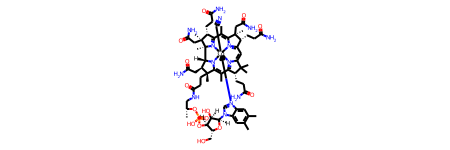

In [132]:
pd_drugbank[pd_drugbank["scaff2_sm"] == "N"].reset_index(drop=True)["mol"][0]

In [174]:
best = {}
unique_scaffold_mt = mtor["scaff2_sm"].unique().tolist()

for scaff in unique_scaffold_mt:
    mols = mtor[mtor["scaff2_sm"] == scaff]
    best[scaff] = mols.sort_values(by="pChEMBL Value", ascending=False).reset_index(drop=True).iloc[0][["mol", "pChEMBL Value"]]

In [179]:
best10 = pd.DataFrame(best).transpose().sort_values(by="pChEMBL Value", ascending=False).reset_index(drop=True).iloc[:10]

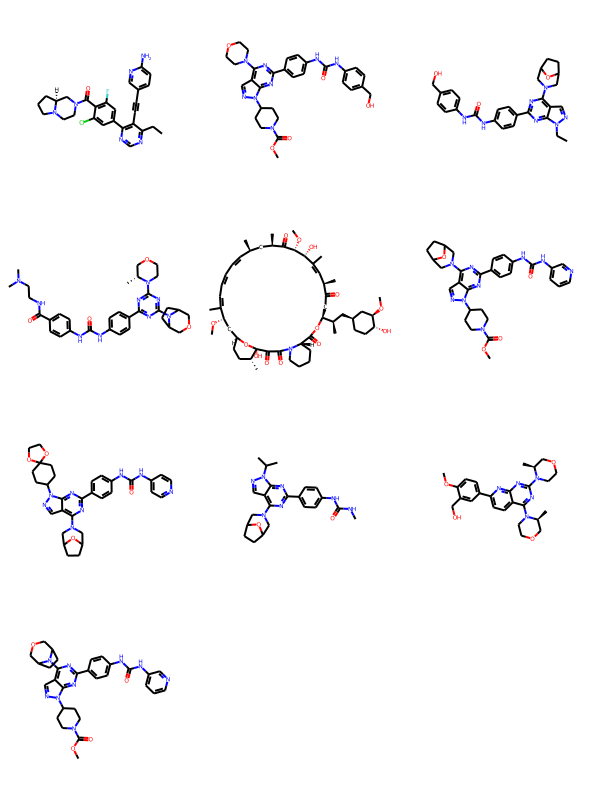

In [180]:
Draw.MolsToGridImage(best10["mol"].tolist())

In [158]:
unique_scaffold_db = pd_drugbank["scaff2_sm"].unique().tolist()

In [160]:
set(unique_scaffold_db) - set(unique_scaffold_mt)

{'',
 'C1CCC2CC(CCC3CCC(C4CCC5CCCCC54)CC3)CCC2C1',
 'C1CCC(CCCCC2CCCC3CCCCC23)CC1',
 'C1CCC(CC2CCC(C3CCCCC3C3CCCC3)CC2)CC1',
 'C1CCC(CC(CC2CCCCC2)C2CCCC2)CC1',
 'C1CCC(CCC2CCCCC2CCC2CCC(CC3CCCCC3)CC2)CC1',
 'C1CCC(CCC2CCC(CCCC3CCC(C4CCC(CC5CCCCC5C5CCCCC5)CC4)CC3CC3CCC4CCCC4C3)CC2)CC1',
 'C1CCC2(CC1)CCCC(CCCC1CCC3CC4(CCC(CCCC5CCCC6(CCCCC6)C5)C4)CCC3C1)C2',
 'C1CCC(CCC2CC2)CC1',
 'C1CCC(C(CCCC2CCCC2C2CCCC2)CC2CCC3CCCCC3C2)CC1',
 'C1CCC(CCC2(C3CCCC3)CCCCC2)CC1',
 'C1CCC(CCC2CCC(CC3CCCC(CCC4CCCCC4)C3)CC2)CC1',
 'C1CCC(C2C3CCCC3CC3CC4CCCC4CC32)CC1.C1CCC(C2C3CCCC3CC3CC4CCCC4CC32)CC1.C1CCC(C2CCCC3CC4CCCC4CC32)CC1.C1CCC(C2CCCC3CC4CCCC4CC32)CC1',
 'C1CCC(C2CCC3C(CCCCC4CCC5CCCCC45)CCCC3C2)CC1',
 'C1CCC(CCCC2CCCC3C2CC2C(C4CCCCC4)CCC32)CC1',
 'C1CCC(CCCC2CCC(CC3CC4CCCCC4C3)CC2)C1',
 'C1CCC2C(C1)CCCC2CC1CCC2CCCCC21',
 'C(CC1CCCC(CCC2CCCC(CCC3CCCC4CCCCC43)C2)C1)CC1CCCC(CCC2CCCC(CCC3CCCC4CCCCC43)C2)C1',
 'C1CCC(CC2CCC(CC3CC(CCC4CCCC(CC5CCCCC5)C4)CC(CC4CCCCC4CC4CCCCC4CC4CCCCC4)C3)CC2)CC1',
 'C1CC2CCC(

In [181]:
len(set(unique_scaffold_mt) - (set(unique_scaffold_mt) - set(unique_scaffold_db)))

60